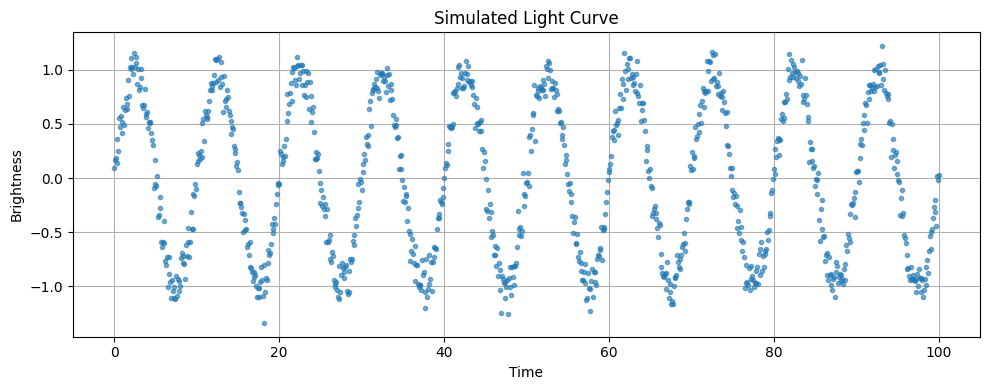

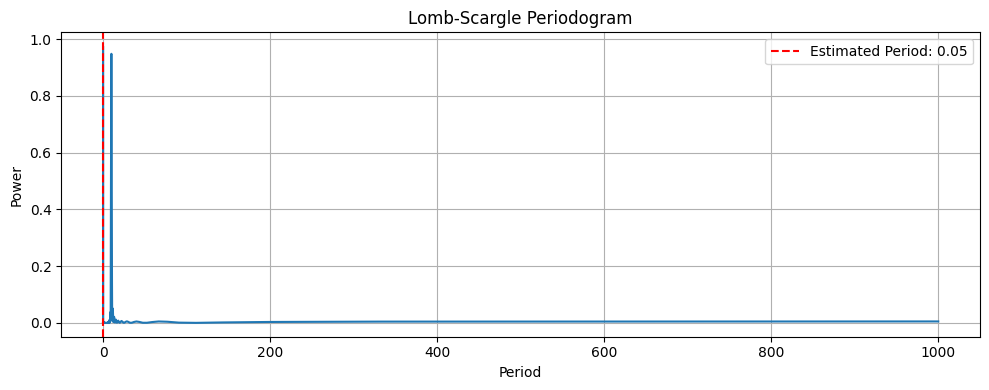


 Estimated Period using Lomb-Scargle: 0.0498


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

def generate_base_light_curve(t, amplitude=1.0, period=10.0, phase=0):
    return amplitude * np.sin(2 * np.pi * t / period + phase)

def add_physical_perturbations(y, strength=0.05):
    perturbation = strength * np.sin(2 * np.pi * np.random.rand() * np.arange(len(y)) / 10)
    return y + perturbation

def add_observational_noise(y, noise_level=0.1):
    return y + np.random.normal(0, noise_level, size=len(y))

def simulate_light_curve(time_span, num_points, **kwargs):
    t = np.linspace(0, time_span, num_points)
    y = generate_base_light_curve(t, **kwargs)
    y = add_physical_perturbations(y)
    y = add_observational_noise(y)
    return t, y

# Simulate one light curve. can change density too.
time_span = 100
num_points = 1000
t, y = simulate_light_curve(time_span, num_points, amplitude=1.0, period=10.0)

# Plot the light curve
plt.figure(figsize=(10, 4))
plt.plot(t, y, '.', alpha=0.6)
plt.title("Simulated Light Curve")
plt.xlabel("Time")
plt.ylabel("Brightness")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Lomb-Scargle Period Detection ---
frequency, power = LombScargle(t, y).autopower()
best_frequency = frequency[np.argmax(power)]
estimated_period = 1 / best_frequency

# Plot the periodogram
plt.figure(figsize=(10, 4))
plt.plot(1 / frequency, power)
plt.axvline(estimated_period, color='r', linestyle='--', label=f"Estimated Period: {estimated_period:.2f}")
plt.xlabel("Period")
plt.ylabel("Power")
plt.title("Lomb-Scargle Periodogram")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f"\n Estimated Period using Lomb-Scargle: {estimated_period:.4f}")



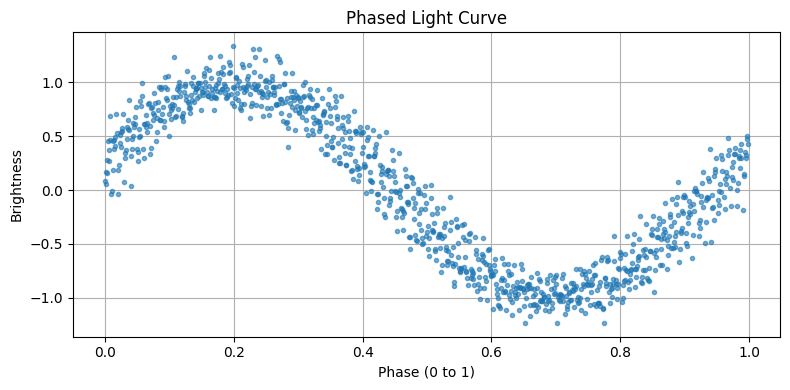

In [2]:
# --- Phase Folding ---
phase = (t % estimated_period) / estimated_period

# Sort by phase for a cleaner plot
sorted_indices = np.argsort(phase)
phase_sorted = phase[sorted_indices]
y_sorted = y[sorted_indices]

# Plot phased light curve
plt.figure(figsize=(8, 4))
plt.plot(phase_sorted, y_sorted, '.', alpha=0.6)
plt.xlabel("Phase (0 to 1)")
plt.ylabel("Brightness")
plt.title("Phased Light Curve")
plt.grid(True)
plt.tight_layout()
plt.show()
